# Sistemas Inteligentes

## Exercício Computacional 2 - Classificação

Preencha todas as células adequadamente e responda todas as perguntas de forma completa e elaborada.

### Identificação do Aluno

#### Nome Completo

Lucas da Silva de Lima

Anderson Chaves Faria

Otávio Rossati

#### RA

11201722101

11053613

11027015

### Instruções

Treine e teste um classificador à sua escolha utilizando a base de dados **Olivetti Faces** (veja as referências).

Faça um caso com com *k-Fold* e um caso de forma direta, ou seja, utilizando o *train_test_split*.

Exiba a acurácia e a *Confusion Matrix*, então discuta sobre o desempenho do classificador para os dois casos.

Entre as células de códigos, insira células de tipo *Markdown* para fornecer explicações sobre os passos realizados; não insira apenas códigos "soltos" sem explicação.

Dica: desta vez, estamos lidando com uma quantidade relativamente grande de classes, então pode ser interessante exibir a *Confusion Matrix* utilizando escala de cinza para representar os valores de cada célula da matriz; para fazer isso, prefira utilizar a função **imshow** com o mapa de cores (argumento **cmap**) do tipo **'Greys'**.

**EXTRA**: tente fazer um caso com *Bootstrap* em vez de *k-Fold*, então comente sobre o método e os resultados.

## Desenvolvimento

# Data Prep
Nas duas primeiras células, importamos as **Olivetti Faces** e atribuimos à váriavel _olivetti_faces_.

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti_faces = fetch_olivetti_faces()

In [38]:
print(olivetti_faces)

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32), 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17

Criamos uma nova váriavel pegando apenas as informações necessárias da variável e printamos uma imagem para testarmos.

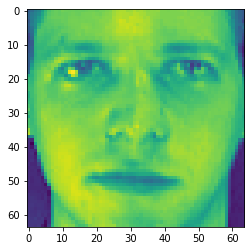

In [24]:
import matplotlib.pyplot as plt

olivetti_faces_img = olivetti_faces.images
plt.imshow(olivetti_faces_img[0])

Redimensionamos a lista de imagens para deixar unidimensional e definimos a variável alvo (eixo y).

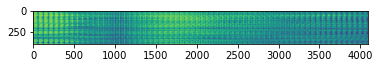

In [84]:
import numpy as np

faces_img = np.reshape(olivetti_faces_img, (olivetti_faces_img.shape[0], olivetti_faces_img.shape[1]*olivetti_faces_img.shape[2]))

plt.imshow(faces_img)

faces_target = olivetti_faces.target

# MLPClassifier com train_test_split
Dividimos nossa amostra em teste (10%) e treino com o **train_test_split** e treinamos uma Rede Neural de **MLPClassifier** com 250 camadas.

In [72]:
from sklearn.model_selection import train_test_split, KFold

x_train, x_test, y_train, y_test = train_test_split(faces_img, faces_target, test_size=0.10, random_state=930)

from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes=(250))
ANN.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=250, solver='lbfgs')

Testamos nossa Rede Neural e calculamos o valor de acurácia e sua matriz de confusão.

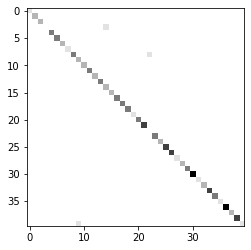

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred_ANN = ANN.predict(x_test)
acc_score = accuracy_score(y_test, y_pred_ANN)
conf_matrix = confusion_matrix(y_test, y_pred_ANN)
plt.imshow(conf_matrix, cmap='Greys')

In [74]:
print('Acurácia do MLPClassifier com SplitTest: ', acc_score)

Acurácia do MLPClassifier com SplitTest:  0.97


# MLPClassifier com KFold

Usamos uma lista para acurácia e uma para as matriz de confusão de cada dobra.

Usamos então um KFold de 10 dobras e uma Rede Neural de MLPClassifier com também 250 camadas. A cada dobra, treinamos a rede neural e calculamos sua acurácia e matriz de confusão.

In [78]:
acc = []
confusion = []

kf = KFold(n_splits=10, random_state=None, shuffle=True)
ANN2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(250))

for (train, test) in kf.split(faces_img, faces_target):
    ANN2.fit(faces_img[train], faces_target[train])
    
    y_pred_ANN2 = ANN2.predict(faces_img[test])
    
    acc.append(accuracy_score(faces_target[test], y_pred_ANN2))
    confusion.append(confusion_matrix(faces_target[test], y_pred_ANN2))

In [85]:
print("Cada dobra teve acurácia de: ")
print(acc)

Cada dobra teve acurácia de: 
[0.925, 1.0, 1.0, 0.925, 0.9, 0.925, 0.825, 0.9, 0.9, 0.9]


Agora analisamos a acurácia e matriz de confusão com o melhor resultado:

Acurácia Máxima do KFold de:  1.0
Para a dobra:  2


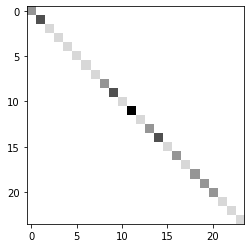

In [83]:
print('Acurácia Máxima do KFold foi de: ', np.amax(acc))
print('Na dobra: ', np.argmax(acc)+1)

plt.imshow(confusion[np.argmax(acc)], cmap='Greys')

## Questões

### 1. O classificador escolhido por você obteve um bom desempenho em sua opinião? Por que?

Sim, considerando a quantidade de features e de dados o desempenho foi satisfatório. Seria interessante repetir o procedimento com menos camadas para análiser como isso poderia impactar no desempenho, pois há a possibilidade de "overfitting".

### 2. Além da acurácia e da matriz de confusão, quais métricas e recursos poderiam ser utilizados para avaliar o seu classificador?

É possível também usar Recall, Precisão, F1 Score (combinação de precisão e recall) ou análise da curva roc.

### 3. O seu classificador obteve um desempenho notoriamente superior ou inferior para alguma das classes? Para qual(is)? Por que você acredita que isso ocorreu?

As classes com pontos mais escuros na matriz de confusão apresentaram desempenho superior, porque provavelmente o algoritmo foi capaz de achar uma correlação de padrões mais sólidas nessas classes.

### 4. O que se poderia fazer para melhorar o desempenho de seu classificador?

Há uma série de possibilidades aqui, otimizar o valor de camadas da rede, tunar os hiperparametros do classificador e até utilizar um pipeline para fazer benchmark de diversos classificadores. É desejável também uma vez finalizando esses testes comparar a classificação final treinando com todos os dados e testando em um novo conjunto de dados não vistos (caso possível).

### 5. Se fosse utilizada apenas metade da base de dados deste exercício em vez de ela toda, mas mantendo as proporções para os dados de treinamento e teste, os resultados sofreriam alguma mudança significativa? Se sim, quais e em qual intensidade?

Com menos dados é possível que haja um decrescimento da acurácia pois menos dados estão sendo vistos para o treinamento, porém o fato de treinarmos com 10% dos dados e ja ter uma alta acurácia mesmo em dados não vistos (base de testes) nos indica de que essa queda não seria tão brusca se ainda mantivermos a proporção.

### 6. Para quê servem métodos como k-Fold e Bootstrap? Você observou alguma mudança significativa por conta de sua utilização? Se sim, qual? E a quê se deve isso?

K-fold serve para dividir a base em diversos grupos, treinar com um e testar com o restante de forma a no fim selecionar o fold que mais nos deu informação sobre o conjunto, é também uma forma de tratar bases com distribuição desigual para maximizar o ganho de informação. Já o bootstrap é uma técnica de reforçar o aprendizado de algumas características importantes com pouca representatividade na base acrescentando mais casos "forjados" com base em casos reais. Também é uma técnica interessante a ser usada quando há poucos dados disponíveis. Tais métodos nos ajudam a treinar nosso classificador de uma forma melhor. Quando utilizamos o k-Fold, a acurácia, que já era consideravelmente alta, aumentou mais um pouco.

## Referências

[Scikit-Learn - Datasets - Olivetti Faces](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

[Scikit-Learn - Resample (Bootstrap)](http://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)